<a href="https://www.kaggle.com/code/swish9/comprehensive-text-data-preprocessing-tutorial?scriptVersionId=142150986" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Objective:

The primary objective of this notebook is to guide you through the essential steps of data preprocessing for CSV-based data. By the end of this tutorial, you should be proficient in importing data, exploring datasets, handling missing values, detecting and removing outliers, encoding categorical variables, and normalizing numeric features.

# Notebook Content


1. **Importing Libraries (Practical):**
   - Begin by importing the necessary Python libraries, such as Pandas, NumPy, and scikit-learn, for data preprocessing.

2. **Importing Dataset (Practical):**
   - Load your CSV-based dataset into a Pandas DataFrame for further analysis.

3. **Exploring the Dataset (Practical):**
   - Some of the Pandas functions used here to explore and understand the dataset are:
     - `head()`: Display the first few rows of the DataFrame.
     - `tail()`: Display the last few rows of the DataFrame.
     - `duplicated()`: Identify duplicate rows in the DataFrame.
     - `drop_duplicates()`: Remove duplicate rows.
     - `describe()`: Provide summary statistics of numeric columns.
     - `info()`: Display information about the DataFrame, including data types and missing values.

4. **Handling Missing Values (Practical):**
   - Address missing values in both categorical and numeric columns using appropriate techniques (e.g., imputation, removal).

5. **Outlier Detection and Removal (Practical):**
   - Identify and handle outliers in numeric columns using visualizations (e.g., box plots) and suitable methods (e.g., removing or transforming outliers).

6. **Encoding Categorical Variables (Practical):**
   - Encode categorical variables using one-hot encoding or label encoding, depending on the nature of the data.

7. **Normalizing Numeric Features (Practical):**
   - Normalize numeric features using techniques like Min-Max Scaling or Standardization.

8. **Conclusion and Next Steps (Theory):**
   - Summarize the key takeaways from the notebook.
   - Suggest further preprocessing steps or additional analysis that can be performed on the cleaned dataset.

# Importing Libraries

In [109]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Enhanced data visualization
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler # Data preprocessing
from sklearn.impute import SimpleImputer # Data preprocessing
from scipy import stats # statistics

# Importing Dataset

In [110]:
df = pd.read_csv('/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv') # Importing dataset 

# Basic Dataset Exploration 

In [111]:
df.head()  # Display the first 5 rows of the DataFrame

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [112]:
df.tail()  # Display the last 5 rows of the DataFrame

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


In [113]:
df.sample(n=5)  # Display the random n rows of the DataFrame

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
13304,115,female,group B,bachelor's degree,standard,completed,married,never,no,2.0,school_bus,5 - 10,63,66,73
4720,977,male,group D,bachelor's degree,standard,none,married,regularly,yes,4.0,school_bus,5 - 10,91,92,90
12222,963,male,group C,NaN,standard,none,single,never,yes,6.0,school_bus,< 5,81,74,73
30288,635,female,group C,associate's degree,standard,none,divorced,regularly,no,1.0,NaN,NaN,41,41,52
4809,68,female,group E,high school,free/reduced,completed,married,regularly,yes,2.0,school_bus,< 5,65,60,66


In [114]:
num_rows, num_columns = df.shape
df.shape

(30641, 15)

In [115]:
df.columns # Display column name 

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

One-line explanation for each column in the provided DataFrame:

1. **'Unnamed: 0'**: Likely an index or identifier column.
2. **'Gender'**: Gender of the student (e.g., male or female).
3. **'EthnicGroup'**: Ethnic group or background of the student.
4. **'ParentEduc'**: Education level of the student's parent(s).
5. **'LunchType'**: Type of lunch the student receives (e.g., free/reduced or standard).
6. **'TestPrep'**: Whether the student completed test preparation (e.g., yes or no).
7. **'ParentMaritalStatus'**: Marital status of the student's parent(s).
8. **'PracticeSport'**: Whether the student practices a sport (e.g., yes or no).
9. **'IsFirstChild'**: Whether the student is the first child in the family (e.g., yes or no).
10. **'NrSiblings'**: Number of siblings the student has.
11. **'TransportMeans'**: Means of transportation to school (e.g., bus, car, etc.).
12. **'WklyStudyHours'**: Number of weekly study hours.
13. **'MathScore'**: Score in the math exam.
14. **'ReadingScore'**: Score in the reading exam.
15. **'WritingScore'**: Score in the writing exam.

In [116]:
df.describe(include='all').T # statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,30641.0,NaN,NaN,NaN,499.556607,288.747894,0.0,249.0,500.0,750.0,999.0
Gender,30641,2,female,15424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EthnicGroup,28801,5,group C,9212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ParentEduc,28796,6,some college,6633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LunchType,30641,2,standard,19905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TestPrep,28811,2,none,18856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ParentMaritalStatus,29451,4,married,16844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PracticeSport,30010,3,sometimes,15213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsFirstChild,29737,2,yes,19082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NrSiblings,29069.0,NaN,NaN,NaN,2.145894,1.458242,0.0,1.0,2.0,3.0,7.0


In [117]:
df.dtypes # Display Datatypes of columns

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [118]:
df.count() # Display non-null values

Unnamed: 0             30641
Gender                 30641
EthnicGroup            28801
ParentEduc             28796
LunchType              30641
TestPrep               28811
ParentMaritalStatus    29451
PracticeSport          30010
IsFirstChild           29737
NrSiblings             29069
TransportMeans         27507
WklyStudyHours         29686
MathScore              30641
ReadingScore           30641
WritingScore           30641
dtype: int64

In [119]:
df[df.isna()] # Display null rows

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df.isnull().sum() # Display null values

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [121]:
df.nunique() # Display Count of Unique Values in a Columns

Unnamed: 0             1000
Gender                    2
EthnicGroup               5
ParentEduc                6
LunchType                 2
TestPrep                  2
ParentMaritalStatus       4
PracticeSport             3
IsFirstChild              2
NrSiblings                8
TransportMeans            2
WklyStudyHours            3
MathScore                95
ReadingScore             90
WritingScore             93
dtype: int64

In [122]:
df.duplicated().sum() # Display Count of Duplicated Values in a Datafram

0

In [123]:
df.drop_duplicates() # Dropping Duplicates

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [124]:
df.info() # Display info about the Datafrme

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


# Data Preprocessing 

In [125]:
categorical_cols = df.select_dtypes(include=['object']).columns # Selecting categorical columns 
numeric_cols = df.select_dtypes(include=[np.number]).columns # Selecting numerical columns 

**Handling Categorical Values**

In [126]:
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [127]:
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [128]:
df[categorical_cols].isnull().sum() # Varifying if categorical missing values are handled well

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
TransportMeans         0
WklyStudyHours         0
dtype: int64

**Handling Numerical Values**

In [129]:
# This is standard approach but it will also outliers i.e. extremely outperforming values which kinda will add noise to data
# numeric_imputer = SimpleImputer(strategy='mean')
# data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

# So we'll be using Trimmed mean approach for handling numeric values 

for col in numeric_cols:
    # Calculate the trimmed mean (5%)
    trimmed_mean = stats.trim_mean(df[col].dropna(), proportiontocut=0.05)
    df[col].fillna(trimmed_mean, inplace=True)

In [130]:
df[numeric_cols].isnull().sum() # Varifying if categorical missing values are handled well

Unnamed: 0      0
NrSiblings      0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

**Encoding Categorical features**

In [131]:
# Initialize the OneHotEncoder with drop='first'
encoder = OneHotEncoder(drop='first', sparse_output=False)
# ‘first’ : drop the first category in each feature.
# sparse_output: Will return sparse matrix if set True else will return an array.

In [132]:
# Fit and transform the encoder on categorical columns
encoded_cols = encoder.fit_transform(df[categorical_cols])

In [133]:
# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
#  concatenates encoded feature name and category with feature + "_" + str(category).E.g. feature X with values 1, 6, 7 create feature names X_1, X_6, X_7

In [134]:
# Drop the original categorical columns from the original DataFrame
df.drop(categorical_cols, axis=1, inplace=True)

In [135]:
# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)
df.head(2)

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,...,TestPrep_none,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10
0,0,3.0,71,71,74,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,1,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [136]:
df.dtypes # Verifying the encoding procedure 

Unnamed: 0                        int64
NrSiblings                      float64
MathScore                         int64
ReadingScore                      int64
WritingScore                      int64
Gender_male                     float64
EthnicGroup_group B             float64
EthnicGroup_group C             float64
EthnicGroup_group D             float64
EthnicGroup_group E             float64
ParentEduc_bachelor's degree    float64
ParentEduc_high school          float64
ParentEduc_master's degree      float64
ParentEduc_some college         float64
ParentEduc_some high school     float64
LunchType_standard              float64
TestPrep_none                   float64
ParentMaritalStatus_married     float64
ParentMaritalStatus_single      float64
ParentMaritalStatus_widowed     float64
PracticeSport_regularly         float64
PracticeSport_sometimes         float64
IsFirstChild_yes                float64
TransportMeans_school_bus       float64
WklyStudyHours_< 5              float64


**Outlier Detection**

In [137]:
df.mean()

Unnamed: 0                      499.556607
NrSiblings                        2.142143
MathScore                        66.558402
ReadingScore                     69.377533
WritingScore                     68.418622
Gender_male                       0.496622
EthnicGroup_group B               0.190137
EthnicGroup_group C               0.360693
EthnicGroup_group D               0.244868
EthnicGroup_group E               0.131882
ParentEduc_bachelor's degree      0.110506
ParentEduc_high school            0.185601
ParentEduc_master's degree        0.066023
ParentEduc_some college           0.276688
ParentEduc_some high school       0.180053
LunchType_standard                0.649620
TestPrep_none                     0.675109
ParentMaritalStatus_married       0.588558
ParentMaritalStatus_single        0.231618
ParentMaritalStatus_widowed       0.019288
PracticeSport_regularly           0.352240
PracticeSport_sometimes           0.517085
IsFirstChild_yes                  0.652263
TransportMe

<Axes: >

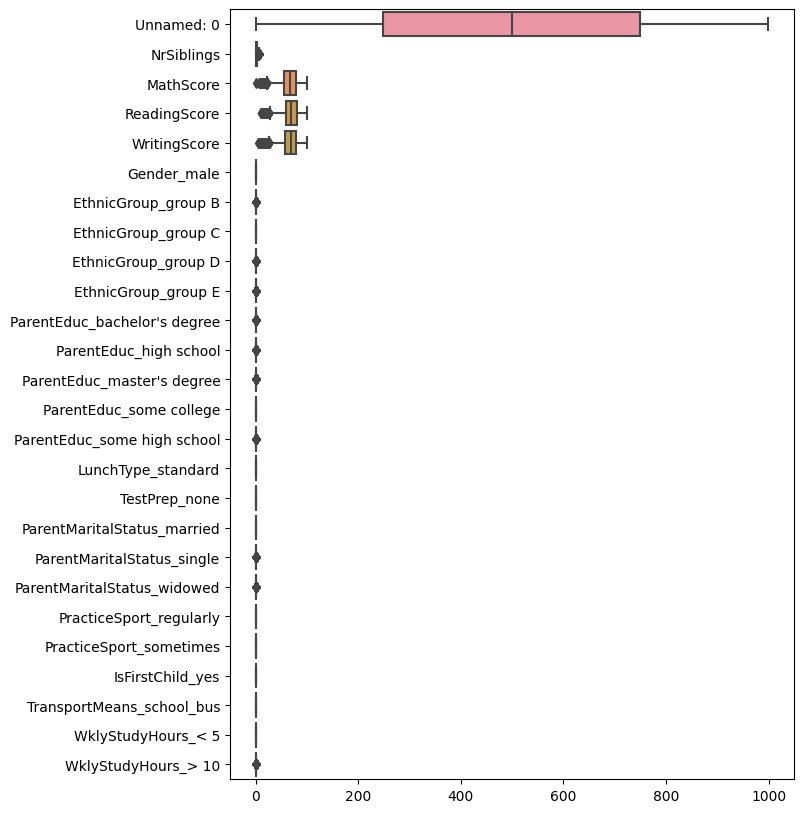

In [138]:
plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, orient="h")

<Axes: >

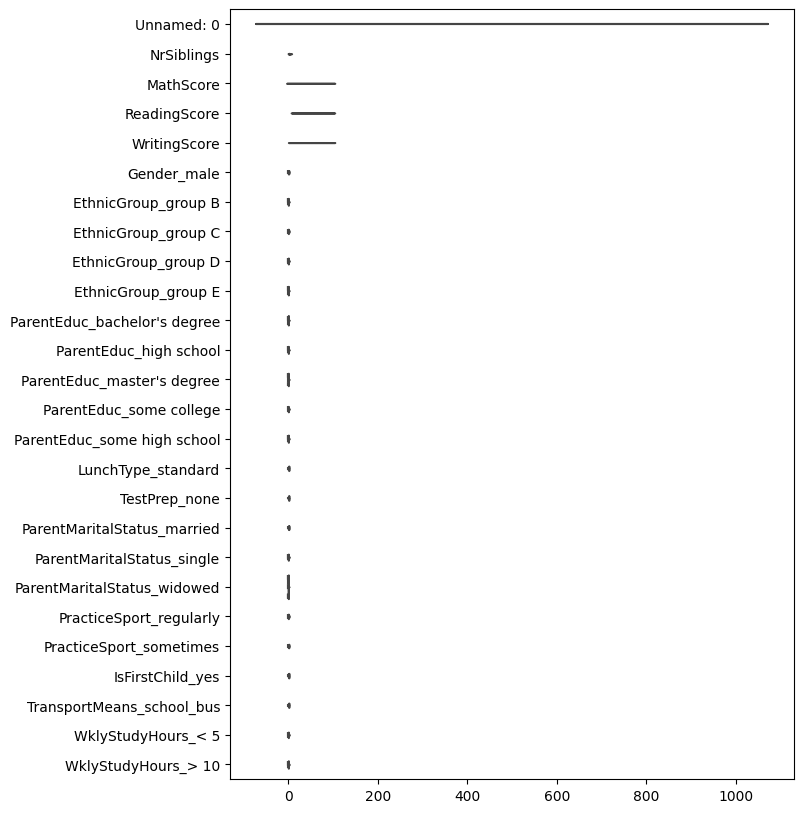

In [139]:
# Create subplots for violin plots
plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 2)
sns.violinplot(data=df, orient="h", inner="quart") 

In [140]:
threshold = 2 # The threshold variable is set to a value that determines how far away from the mean is considered an outlier
df = df[(np.abs(df - df.mean()) < threshold * df.std()).all(axis=1)] # (x - mean) / std represents the z-score or standard score of a data point x in a dataset.

In [141]:
df.mean()

Unnamed: 0                      498.398326
NrSiblings                        1.911117
MathScore                        66.451622
ReadingScore                     69.877257
WritingScore                     69.258552
Gender_male                       0.501835
EthnicGroup_group B               0.000000
EthnicGroup_group C               0.536045
EthnicGroup_group D               0.357510
EthnicGroup_group E               0.000000
ParentEduc_bachelor's degree      0.000000
ParentEduc_high school            0.000000
ParentEduc_master's degree        0.000000
ParentEduc_some college           0.606372
ParentEduc_some high school       0.000000
LunchType_standard                0.661283
TestPrep_none                     0.678314
ParentMaritalStatus_married       0.607547
ParentMaritalStatus_single        0.235942
ParentMaritalStatus_widowed       0.000000
PracticeSport_regularly           0.354867
PracticeSport_sometimes           0.516077
IsFirstChild_yes                  0.653502
TransportMe

**Normalizing Data**

In [142]:
# Initialize the MinMaxScaler
MMS = MinMaxScaler()

In [143]:
# Fit and transform the scaler on numeric columns
df[numeric_cols] = MMS.fit_transform(df[numeric_cols])

In [144]:
df.head(3)

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,...,TestPrep_none,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10
1,0.001001,0.00,0.540984,0.862069,0.819672,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.003003,0.25,0.147541,0.275862,0.065574,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.004004,0.00,0.655738,0.655172,0.606557,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [145]:
df.describe(include='all').T # vering the normalization

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6811.0,0.498897,0.290727,0.0,0.245245,0.500501,0.755756,1.0
NrSiblings,6811.0,0.477779,0.290056,0.0,0.250000,0.500000,0.750000,1.0
MathScore,6811.0,0.499207,0.214643,0.0,0.344262,0.491803,0.655738,1.0
ReadingScore,6811.0,0.515125,0.218389,0.0,0.362069,0.517241,0.672414,1.0
WritingScore,6811.0,0.512435,0.216145,0.0,0.360656,0.508197,0.672131,1.0
Gender_male,6811.0,0.501835,0.500033,0.0,0.000000,1.000000,1.000000,1.0
EthnicGroup_group B,6811.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
EthnicGroup_group C,6811.0,0.536045,0.498736,0.0,0.000000,1.000000,1.000000,1.0
EthnicGroup_group D,6811.0,0.357510,0.479302,0.0,0.000000,0.000000,1.000000,1.0
EthnicGroup_group E,6811.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [146]:
df.corr()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,...,TestPrep_none,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10
Unnamed: 0,1.000000,-0.001126,0.004648,0.007480,0.006112,-0.000576,NaN,0.016417,-0.011308,NaN,...,0.008933,0.018804,-0.026186,NaN,0.005664,-0.008801,-0.006524,0.012170,0.016143,NaN
NrSiblings,-0.001126,1.000000,0.003579,0.018556,0.011754,-0.009118,NaN,-0.027506,0.030718,NaN,...,0.010028,0.013277,-0.005657,NaN,-0.012965,0.003337,-0.148539,-0.012720,-0.002159,NaN
MathScore,0.004648,0.003579,1.000000,0.762968,0.750180,0.211041,NaN,-0.046456,0.082395,NaN,...,-0.091792,0.001842,-0.007680,NaN,0.027690,-0.002254,-0.011222,0.004343,-0.053675,NaN
ReadingScore,0.007480,0.018556,0.762968,1.000000,0.936026,-0.251816,NaN,-0.018872,0.054491,NaN,...,-0.168077,-0.005154,0.004512,NaN,-0.015610,0.000892,-0.009639,-0.006255,-0.023294,NaN
WritingScore,0.006112,0.011754,0.750180,0.936026,1.000000,-0.314333,NaN,-0.073558,0.120932,NaN,...,-0.261662,-0.005517,0.003292,NaN,0.023905,-0.015283,-0.016916,-0.005372,-0.024071,NaN
Gender_male,-0.000576,-0.009118,0.211041,-0.251816,-0.314333,1.000000,NaN,-0.007184,0.007984,NaN,...,-0.002187,0.033920,-0.021750,NaN,0.015382,0.004730,0.006375,0.034436,-0.002547,NaN
EthnicGroup_group B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EthnicGroup_group C,0.016417,-0.027506,-0.046456,-0.018872,-0.073558,-0.007184,NaN,1.000000,-0.801813,NaN,...,-0.004113,0.008952,0.008720,NaN,0.016232,-0.004829,-0.014808,-0.007374,0.007666,NaN
EthnicGroup_group D,-0.011308,0.030718,0.082395,0.054491,0.120932,0.007984,NaN,-0.801813,1.000000,NaN,...,0.006102,0.001019,-0.009754,NaN,-0.010309,-0.000397,0.015916,0.001040,-0.009501,NaN
EthnicGroup_group E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Conclusion

**In conclusion, this comprehensive CSV data preprocessing tutorial has covered essential steps to prepare your dataset for analysis, visualization, and machine learning applications.** 